# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [445]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [446]:
print("Чтобы зафиксировать одни и те же псевдослучайные генерируемые значения")

Чтобы зафиксировать одни и те же псевдослучайные генерируемые значения


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [447]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [448]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [449]:
print(df_test.head(5))
print()
print(df_test.tail(5))

                                     name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 b

(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [450]:
print('Числовые признаки')
print(df_test.describe())
print()
print()
print('Категориальные признаки')
print(df_test.describe(exclude=[np.number]))

Числовые признаки
              year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000


Категориальные признаки
                       name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   e

(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [451]:
df_train.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [452]:
df_test.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

И в тестовом, и в тренировочном датасетах пропуски есть в столбцах mileage, engine, max_power, torque, seats

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [453]:
df_train_check = df_train.drop(['selling_price'], axis = 1)

print('Число дубликатов в тренировочном датасете равно ',len(df_train_check)-len(df_train_check.drop_duplicates()))

Число дубликатов в тренировочном датасете равно  1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [454]:
# your code here
df_train_check.loc[df_train_check.duplicated(), :]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [455]:
ind_del = list(df_train_check.loc[df_train_check.duplicated(), :].index)
df_train.drop(index = ind_del, axis = 0, inplace = True)

In [456]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [457]:
df_train.reset_index(drop = True, inplace = True)
print(df_train)

                                   name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [458]:
def reg_clear(x):
    if x == 'nan' or x == ' bhp':
        v = 'nan'
    else:
        if '.' in x:
            result = re.search(r'\d+\.\d*', str(x))
        else:
            result = re.search(r'\d+', str(x))
        v = result.group(0)
    return v

import re
#df_copy_train = df_train.copy()
df_test['mileage'] = df_test['mileage'].astype(str)
df_test['mileage'] = df_test.mileage.apply(lambda x: reg_clear(x))
df_test['mileage'] = df_test['mileage'].astype(float)


df_test['max_power'] = df_test['max_power'].astype(str)
df_test['max_power'] = df_test.max_power.apply(lambda x: reg_clear(x))
df_test['max_power'] = df_test['max_power'].astype(float)

df_test['engine'] = df_test['engine'].astype(str)
df_test['engine'] = df_test.engine.apply(lambda x: reg_clear(x))
df_test['engine'] = df_test['engine'].astype(float)

df_test.drop(['torque'], axis = 1, inplace = True)

df_train['mileage'] = df_train['mileage'].astype(str)
df_train['mileage'] = df_train.mileage.apply(lambda x: reg_clear(x))
df_train['mileage'] = df_train['mileage'].astype(float)


df_train['max_power'] = df_train['max_power'].astype(str)
df_train['max_power'] = df_train.max_power.apply(lambda x: reg_clear(x))
df_train['max_power'] = df_train['max_power'].astype(float)

df_train['engine'] = df_train['engine'].astype(str)
df_train['engine'] = df_train.engine.apply(lambda x: reg_clear(x))
df_train['engine'] = df_train['engine'].astype(float)

df_train.drop(['torque'], axis = 1, inplace = True)
#for i in range(0, df_copy_train.shape[0]):
    #ch = df_copy_train.iloc[i]['max_power']
    #print(ch)
    #print(type(ch))
    #print()
    #print(reg_clear(ch))
    #print("Next_element\n")
print("Train_check")
print(df_train.sample(3))
print()
print("Test_check")
print(df_test.sample(3))

Train_check
                                        name  year  selling_price  km_driven  \
635                   Mahindra XUV500 W8 2WD  2014         650000      90000   
3423                Hyundai Verna 1.6 VTVT S  2016         850000      25000   
4744  Ford EcoSport 1.5 Petrol Titanium BSIV  2019         885000      10000   

        fuel seller_type transmission         owner  mileage  engine  \
635   Diesel  Individual       Manual  Second Owner    15.10  2179.0   
3423  Petrol  Individual       Manual   First Owner    17.01  1591.0   
4744  Petrol  Individual       Manual  Second Owner    17.00  1497.0   

      max_power  seats  
635      140.00    7.0  
3423     121.30    5.0  
4744     121.31    5.0  

Test_check
                                    name  year  selling_price  km_driven  \
738  Volkswagen Ameo 1.5 TDI Comfortline  2018         560000      18000   
339            Tata Manza Aqua Quadrajet  2011          88000      97343   
791                   Maruti Wagon R L

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



Я честно сначала заполнял медианой, потом в рамках feature-engeneering поменял на моду и медиану закомментил.

In [459]:
#med_engine = df_train['engine'].median()
#med_max_power = df_train['max_power'].median()
#med_mileage = df_train['mileage'].median()
#med_seats = df_train['seats'].median()

#df_train['engine'] = df_train['engine'].fillna(value = med_engine)
#df_train['max_power'] = df_train['max_power'].fillna(value = med_max_power)
#df_train['mileage'] = df_train['mileage'].fillna(value = med_mileage)
#df_train['seats'] = df_train['seats'].fillna(value = med_seats)

#df_test['engine'] = df_test['engine'].fillna(value = med_engine)
#df_test['max_power'] = df_test['max_power'].fillna(value = med_max_power)
#df_test['mileage'] = df_test['mileage'].fillna(value = med_mileage)
#df_test['seats'] = df_test['seats'].fillna(value = med_seats)


#print(med_engine)
#print(med_max_power)
#print(med_mileage)
#print(med_seats)



mod_engine = df_train['engine'].mode()
mod_max_power = df_train['max_power'].mode()
mod_mileage = df_train['mileage'].mode()
mod_seats = df_train['seats'].mode()


df_train['engine'] = df_train['engine'].fillna(value = mod_engine[0])
df_train['max_power'] = df_train['max_power'].fillna(value = mod_max_power[0])
df_train['mileage'] = df_train['mileage'].fillna(value = mod_mileage[0])
df_train['seats'] = df_train['seats'].fillna(value = mod_seats[0])

df_test['engine'] = df_test['engine'].fillna(value = mod_engine[0])
df_test['max_power'] = df_test['max_power'].fillna(value = mod_max_power[0])
df_test['mileage'] = df_test['mileage'].fillna(value = mod_mileage[0])
df_test['seats'] = df_test['seats'].fillna(value = mod_seats[0])


#print(mod_engine[0])
#print(mod_max_power)
#print(mod_mileage)
#print(mod_seats)




In [460]:
df_train.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage          False
engine           False
max_power        False
seats            False
dtype: bool

In [461]:
df_test.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage          False
engine           False
max_power        False
seats            False
dtype: bool


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [462]:
print("У seats сильно ограниченное число возможных значений(она не является непрерывной величиной), поэтому целесообразно ее сделать категориальной")
print(df_train['seats'].unique())
print(df_test['seats'].unique())

У seats сильно ограниченное число возможных значений(она не является непрерывной величиной), поэтому целесообразно ее сделать категориальной
[ 5.  4.  7.  8.  6.  9. 10. 14.  2.]
[7. 5. 6. 4. 8. 9.]


In [463]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

print(df_train.sample(3))

                                      name  year  selling_price  km_driven  \
2320                      Renault KWID RXT  2016         240000      59300   
1147  Mahindra Scorpio VLX 2WD AIRBAG BSIV  2011         450000      90000   
3682                    Mahindra XUV300 W8  2019         960000      20000   

        fuel seller_type transmission        owner  mileage  engine  \
2320  Petrol  Individual       Manual  First Owner    25.17     799   
1147  Diesel  Individual       Manual  Third Owner    12.05    2179   
3682  Petrol  Individual       Manual  First Owner    17.00    1197   

      max_power  seats  
2320       53.3      5  
1147      120.0      8  
3682      108.6      5  


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

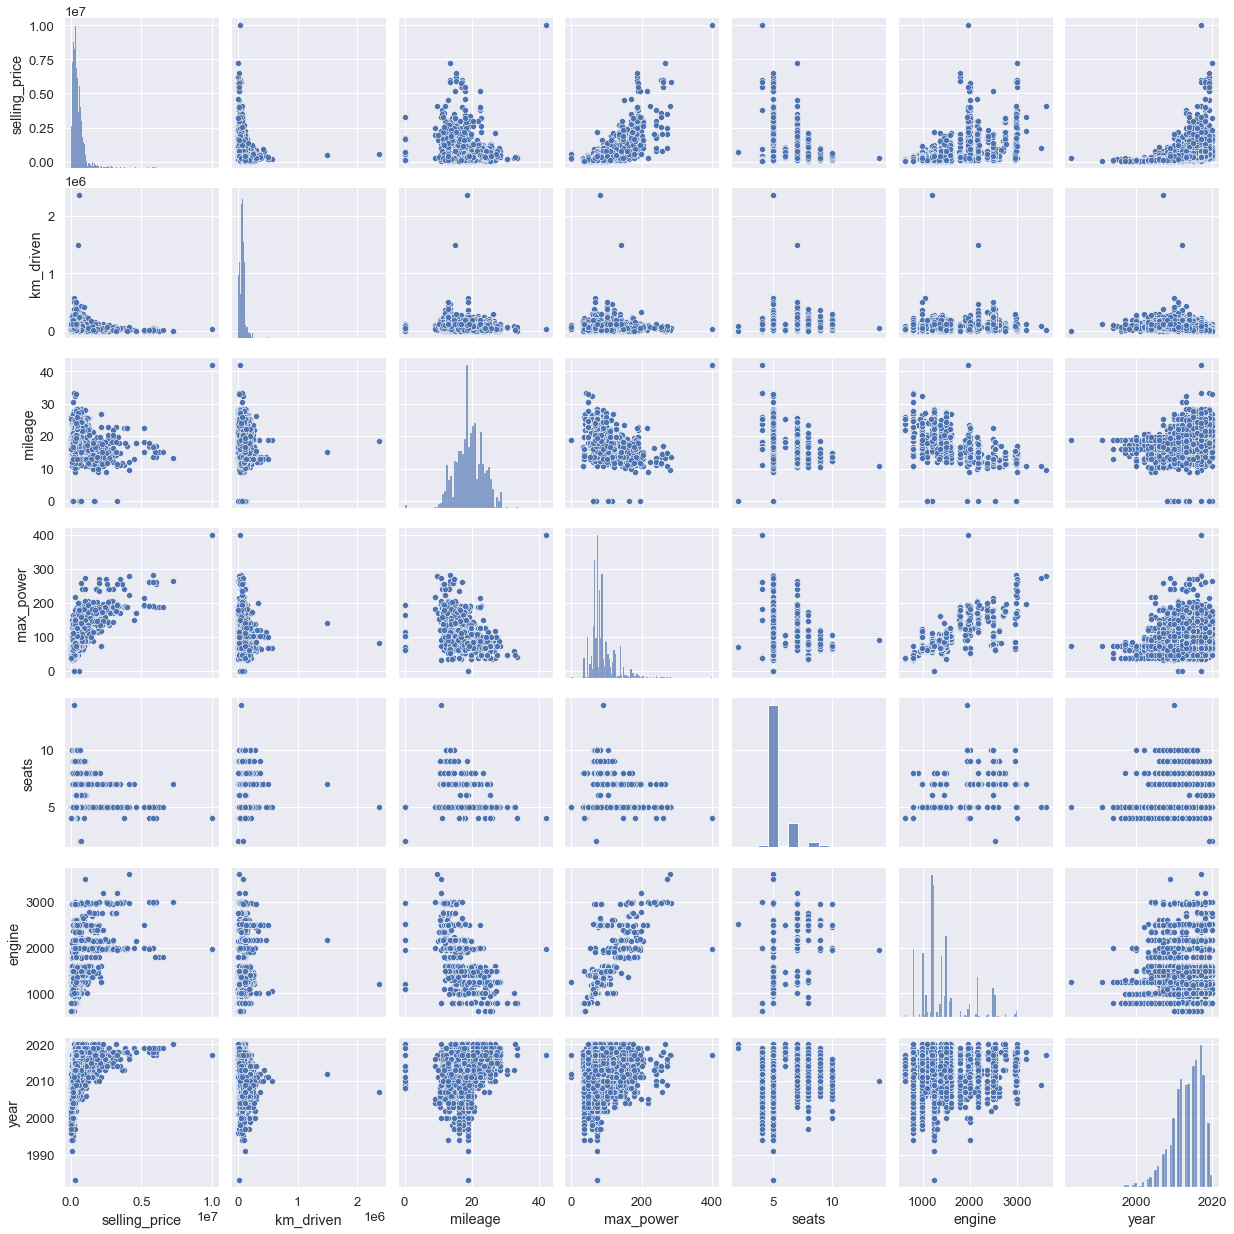

In [410]:
sns.pairplot(df_train[['selling_price','km_driven', 'mileage', 'max_power', 'seats', 'engine', 'year']])

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

-Сильнее всего из предикторов с целевой переменной selling price связаны признаки max_power, engine, year. Умозрительно хочется сказать, что km_driven также коррелирует с целевой переменной, но на основе лишь графиков выше можно сказать, что если зависимость и присутствует, то она слабая, что весьма странно, так как цена должна зависеть от пробега.

-Из признаков наиболее сильно коррелируют между собой max_power и engine. Что в принципе логично, так как первое - это макс мощность двигателя, а второе объем двигателя. Интуитивно хочется предположить, что пробег связан с годом выпуска(чем меньше год, тем больше пробег), но по данным графикам такое сказать однозначно нельзя.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

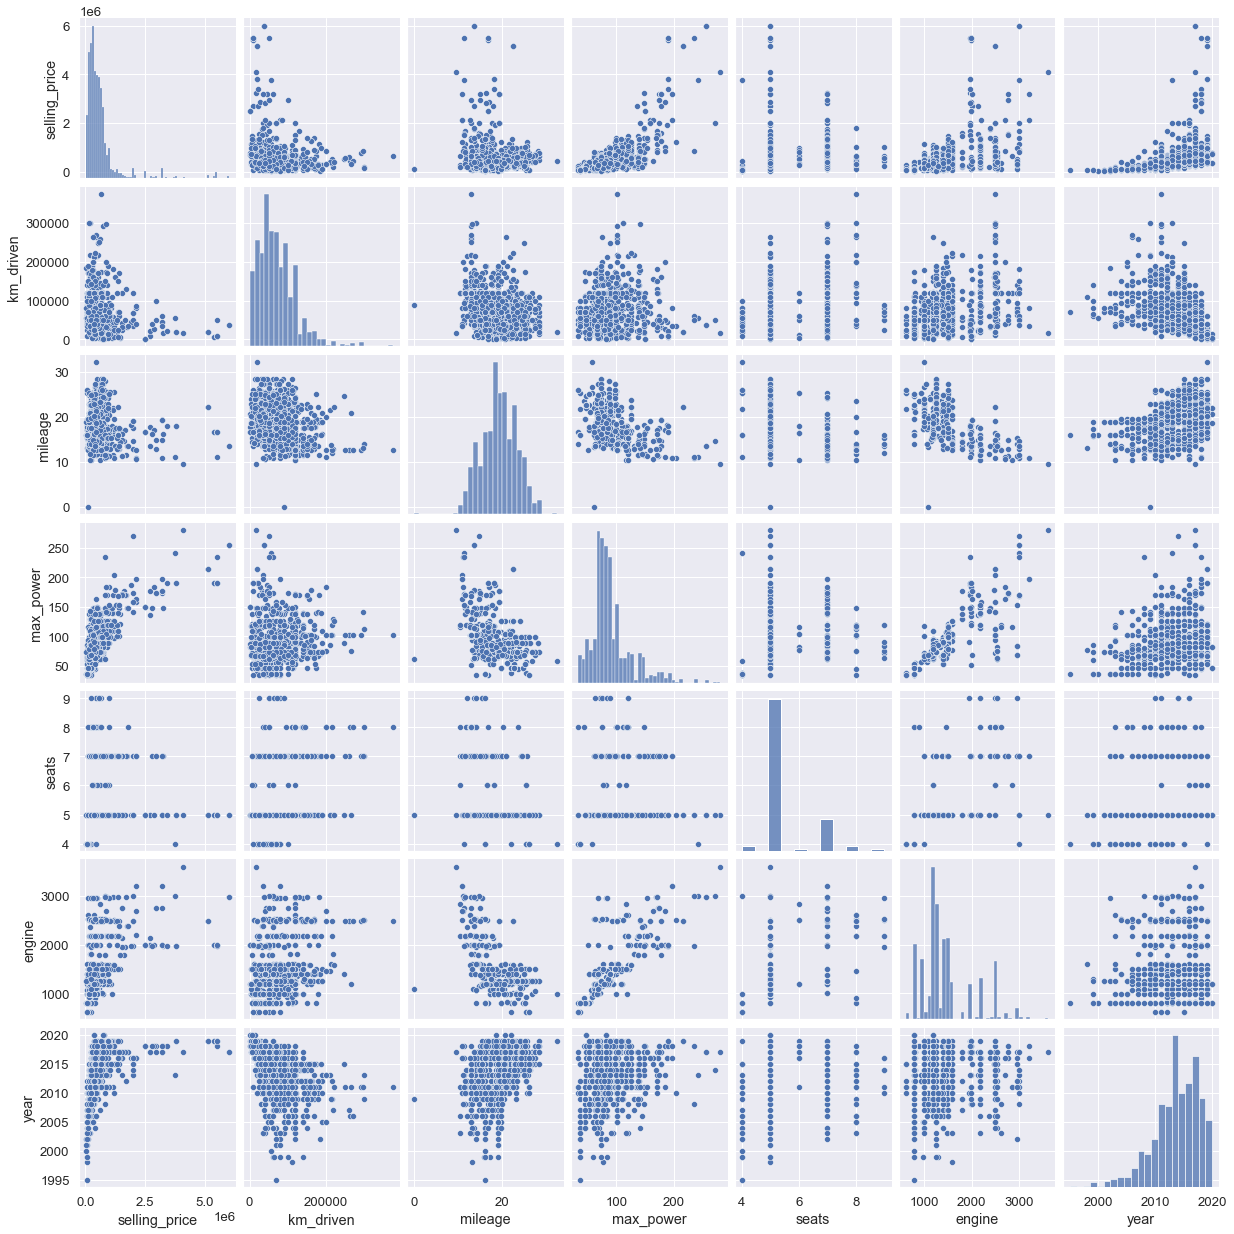

In [411]:
sns.pairplot(df_test[['selling_price','km_driven', 'mileage', 'max_power', 'seats', 'engine', 'year']])

Да, совокупности при разделении на трейн и тест оказались похожими

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot:>

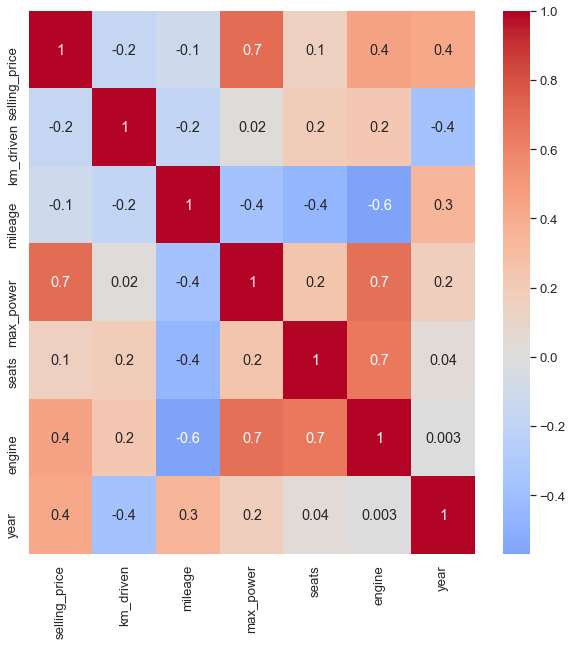

In [412]:
corr_matrix = df_train[['selling_price','km_driven', 'mileage', 'max_power', 'seats', 'engine', 'year']].corr()
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix,cmap='coolwarm',
            center = 0, 
            annot=True,
            fmt='.1g')

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

-Наименее всего скоррелированы между собой признаки engine и year.

-Наиболее сильная положительная линейная зависимость наблюдается между парами признаков engine и max_power, engine и seats.

-В принципе да, так как хитмэп показывает, что некоторая отрицательная корреляция(хоть эту зависимость и нельзя назвать сильной) все же присутствует.


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<AxesSubplot:xlabel='max_power', ylabel='engine'>

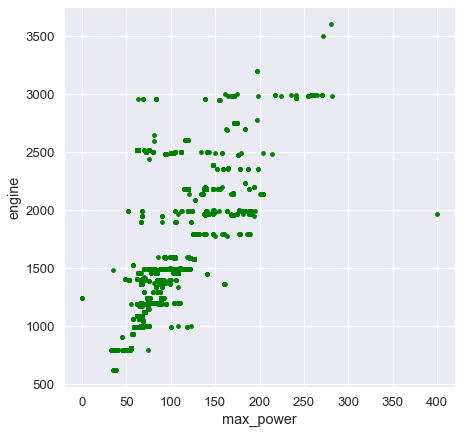

In [413]:
df_corr = df_train[['max_power','engine']]
df_corr.plot.scatter(x = 'max_power', y = 'engine', color = 'green', s = 14, figsize=(7, 7))

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

<AxesSubplot:xlabel='mileage', ylabel='engine'>

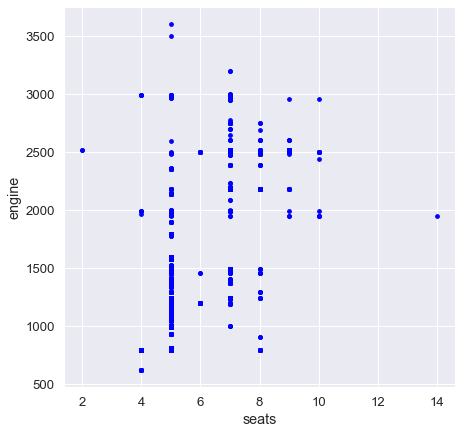

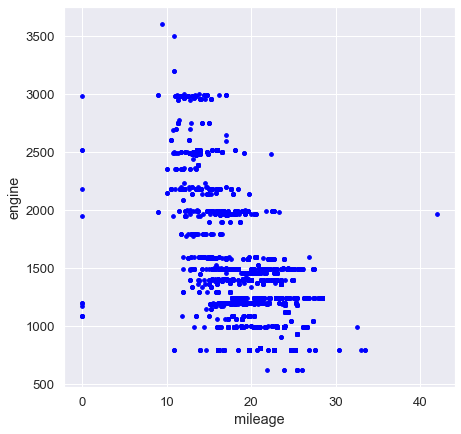

In [414]:
df_corr = df_train[['seats','engine']]
df_corr.plot.scatter(x = 'seats', y = 'engine', color = 'blue', s = 14, figsize=(7, 7))

df_corr = df_train[['mileage','engine']]
df_corr.plot.scatter(x = 'mileage', y = 'engine', color = 'blue', s = 14, figsize=(7, 7))

Думаю, что еще стоит уделить внимание зависимостям engine-seats и engine-mileage, так как в первом случае имеет место довольно-таки сильная положительная корреляция, а во втором - сильная отрицательная корреляция.

Тем более в случае если зависимость "объем двигателя-количество сидений" еще как-то интуитивно объяснима(чем больше мест, тем больше суммарная масса, которую нужно сдвинуть с места, а значит и объем двигателя должен быть больше), то отрицательный знак зависимости "объем двигателя - расход топлива" лично для меня не очень очевиден.

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [415]:
y_train = pd.DataFrame(df_train['selling_price'])
X_train = df_train.drop(['selling_price', 'name', 'fuel', 'seller_type', 'owner', 'transmission'], axis=1)
#print(X_train.sample(4))
#print(y_train.sample(4))

In [416]:
assert X_train.shape == (5840, 6)

In [417]:
y_test = pd.DataFrame(df_test['selling_price'])
X_test = df_test.drop(['selling_price', 'name', 'fuel', 'seller_type', 'owner', 'transmission'], axis=1)

In [418]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [419]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
print("Test metrics:")
print("R2 score: ", r2_score(y_test, pred))
print("MSE: ",MSE(y_test, pred))
print()
print("Train metrics:")
print("R2 score: ", r2_score(y_train, lr_reg.predict(X_train)))
print("MSE: ",MSE(y_train, lr_reg.predict(X_train)))#3.25

Test metrics:
R2 score:  0.5934359875658666
MSE:  233704604042.0835

Train metrics:
R2 score:  0.5911185636068739
MSE:  117201095513.11156


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [420]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()

scal.fit(X_train)
X_train_tr = pd.DataFrame(scal.transform(X_train))
X_test_tr = pd.DataFrame(scal.transform(X_test))

print(X_train.head())
print("---------------------------")
print(X_train_tr.head())
#print()

lr_reg_tr = LinearRegression()
lr_reg_tr.fit(X_train_tr, y_train)
pred_tr = lr_reg_tr.predict(X_test_tr)
print("Test metrics:")
print("R2 score: ", r2_score(y_test, pred_tr))
print("MSE: ",MSE(y_test, pred_tr))
print()
print("Train metrics:")
print("R2 score: ", r2_score(y_train, lr_reg_tr.predict(X_train_tr)))
print("MSE: ",MSE(y_train, lr_reg_tr.predict(X_train_tr)))

# your code here

   year  km_driven  mileage  engine  max_power  seats
0  2014     145500    23.40    1248      74.00      5
1  2014     120000    21.14    1498     103.52      5
2  2010     127000    23.00    1396      90.00      5
3  2007     120000    16.10    1298      88.20      5
4  2017      45000    20.14    1197      81.86      5
---------------------------
          0         1         2         3         4         5
0  0.139570  1.191152  0.999351 -0.373643 -0.430674 -0.434419
1  0.139570  0.766619  0.432468  0.141162  0.500123 -0.434419
2 -0.837167  0.883158  0.899018 -0.068879  0.073823 -0.434419
3 -1.569719  0.766619 -0.831730 -0.270682  0.017067 -0.434419
4  0.872122 -0.482007  0.181635 -0.478663 -0.182840 -0.434419
Test metrics:
R2 score:  0.5934359875658805
MSE:  233704604042.07547

Train metrics:
R2 score:  0.5911185636068741
MSE:  117201095513.11151


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [421]:
print(lr_reg.coef_)

[[ 3.62122542e+04 -7.45997153e-01  7.39472113e+03  1.25775729e+02
   1.01982242e+04 -2.40380678e+04]]


Этим признаком оказался year

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [422]:
from sklearn.linear_model import Lasso

lr_reg_l1 = Lasso()

lr_reg_l1.fit(X_train_tr, y_train)

pred_l1 = lr_reg_l1.predict(X_test_tr)

print("Test metrics:")
print("R2 score: ", r2_score(y_test, pred_l1))
print("MSE: ",MSE(y_test, pred_l1))
print()
print("Train metrics:")
print("R2 score: ", r2_score(y_train, lr_reg_l1.predict(X_train_tr)))
print("MSE: ",MSE(y_train, lr_reg_l1.predict(X_train_tr)))

print(lr_reg_l1.coef_)
# your code here

Test metrics:
R2 score:  0.5934348204734572
MSE:  233705274920.12747

Train metrics:
R2 score:  0.5911185635714388
MSE:  117201095523.26862
[148298.82168722 -44807.927878    29478.76135167  61074.50807353
 323434.89941004 -23608.7398312 ]


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

Не занулила. Потому что порядок весов примерно одинаков, ни один не оказывается слишком мал по модулю по сравнению с остальными, чтобы регуляризация посчитала его незначимым.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [423]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[0.01, 0.1, 1, 10, 100, 1000, 10000]}
Las = Lasso()
Las_grid = GridSearchCV(Las, param_grid = parameters, cv = 10)
Las_grid.fit(X_train_tr, y_train).best_params_
print(Las_grid.best_params_)
#print(Las_grid.coef_)
# your code here

{'alpha': 10000}


In [424]:
lr_reg_l1 = Lasso(alpha = 10000)

lr_reg_l1.fit(X_train_tr, y_train)

pred_l1 = lr_reg_l1.predict(X_test_tr)

print("Test metrics:")
print("R2 score: ", r2_score(y_test, pred_l1))
print("MSE: ",MSE(y_test, pred_l1))
print()
print("Train metrics:")
print("R2 score: ", r2_score(y_train, lr_reg_l1.predict(X_train_tr)))
print("MSE: ",MSE(y_train, lr_reg_l1.predict(X_train_tr)))

print(lr_reg_l1.coef_)

Test metrics:
R2 score:  0.5808447780099957
MSE:  240942390844.82565

Train metrics:
R2 score:  0.5880864773336427
MSE:  118070207684.2283
[147250.91944733 -33395.19189717  10068.9438199   17368.06789108
 330169.19783621     -0.        ]


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

В моем случае 7 моделей и лучшим коэффициентом является 10000. Занулился вес при seats

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [425]:
from sklearn.linear_model import ElasticNet

parameters = {'alpha':np.arange(0.01, 0.1, 0.01), 'l1_ratio':np.arange(0.1, 1.1, 0.1)}
Elas = ElasticNet()
Elas_grid = GridSearchCV(Elas, param_grid = parameters, cv = 10)
Elas_grid.fit(X_train_tr, y_train).best_params_

pred_l1 = Elas_grid.predict(X_test_tr)

print("Test metrics:")
print("R2 score: ", r2_score(y_test, pred_l1))
print("MSE: ",MSE(y_test, pred_l1))
print()
print("Train metrics:")
print("R2 score: ", r2_score(y_train, Elas_grid.predict(X_train_tr)))
print("MSE: ",MSE(y_train, Elas_grid.predict(X_train_tr)))

# your code here

Test metrics:
R2 score:  0.5755795051024879
MSE:  243969020065.29062

Train metrics:
R2 score:  0.5884250495869885
MSE:  117973159896.11516


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [426]:
print(Elas_grid.best_params_)

{'alpha': 0.09, 'l1_ratio': 0.1}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [427]:
X_train_cat = df_train.drop(['selling_price', 'name'], axis=1)
X_test_cat = df_test.drop(['selling_price', 'name'], axis=1)

print(df_train['seller_type'].unique())
print(df_train['owner'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [428]:
assert X_train_cat.shape == (5840, 10)
assert X_test_cat.shape == (1000, 10)

In [429]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


In [430]:
X_test_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,534,837,877,623


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [431]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_dum_train = pd.get_dummies(X_train_cat, drop_first=True)
print(X_dum_train.shape)
print(X_dum_train.head(4))
# your code here

X_dum_test = pd.get_dummies(X_test_cat, drop_first=True)
print(X_dum_test.shape)
print(X_dum_test.head(4))

scal = StandardScaler()

scal.fit(X_dum_train)
X_train_tr = pd.DataFrame(scal.transform(X_dum_train), columns = X_dum_train.columns)
X_test_tr = pd.DataFrame(scal.transform(X_dum_test), columns = X_dum_test.columns)

print(X_train_tr.head(4))
print("_______________________")
print(X_test_tr.head(4))

(5840, 16)
   year  km_driven  mileage  engine  max_power  seats  fuel_Diesel  fuel_LPG  \
0  2014     145500    23.40    1248      74.00      5            1         0   
1  2014     120000    21.14    1498     103.52      5            1         0   
2  2010     127000    23.00    1396      90.00      5            1         0   
3  2007     120000    16.10    1298      88.20      5            0         0   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0            0                       1                             0   
1            0                       1                             0   
2            0                       1                             0   
3            1                       1                             0   

   transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
0                    1                           0                   0   
1                    1                           0                   1   
2    

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [432]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

rid_reg = Ridge()
parameters = {'alpha':[0.01, 0.1, 1, 10, 100, 1000, 10000]}
rid_reg_grid = GridSearchCV(rid_reg, param_grid = parameters, scoring = r2_score, cv = 10)
rid_reg_grid.fit(X_train_tr, y_train).best_params_
print(rid_reg_grid.best_params_)
# your code here

{'alpha': 0.01}


In [433]:
lr_reg_l2 = Ridge(alpha = 0.01)

lr_reg_l2.fit(X_train_tr, y_train)

pred_l2 = lr_reg_l2.predict(X_test_tr)

print("Test metrics:")
print("R2 score: ", r2_score(y_test, pred_l2))
print("MSE: ",MSE(y_test, pred_l2))
print()
print("Train metrics:")
print("R2 score: ", r2_score(y_train, lr_reg_l2.predict(X_train_tr)))
print("MSE: ",MSE(y_train, lr_reg_l2.predict(X_train_tr)))

#print(lr_reg_l2.coef_)

Test metrics:
R2 score:  0.6192027340121379
MSE:  218893142398.8713

Train metrics:
R2 score:  0.6485914862338356
MSE:  100727152470.74786


Качество предсказаний удалось улучшить, судя по R2.

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [464]:
# your code here
df_train_c = df_train.copy()
df_test_c = df_test.copy()
df_train_c['hpl'] = df_train_c['max_power'] / df_train_c['engine'] * 1000
df_train_c['year2'] = df_train_c['year'] * df_train_c['year']

df_test_c['hpl'] = df_test_c['max_power'] / df_test_c['engine'] * 1000
df_test_c['year2'] = df_test_c['year'] * df_test_c['year']

df_train_c.head(5)

conditions = [(((df_train_c['owner'] == 'First Owner')|(df_train_c['owner'] == 'Second Owner'))&
              (df_train_c['seller_type'] == 'Trustmark Dealer')),
             (df_train_c['owner'] == 'Third Owner'),
             (df_train_c['owner'] == 'Fourth & Above Owner'),
             (df_train_c['seller_type'] == 'Dealer'),
             (df_train_c['seller_type'] == 'Individual')]

conditions2 = [(((df_test_c['owner'] == 'First Owner')|(df_test_c['owner'] == 'Second Owner'))&
              (df_test_c['seller_type'] == 'Trustmark Dealer')),
             (df_test_c['owner'] == 'Third Owner'),
             (df_test_c['owner'] == 'Fourth & Above Owner'),
             (df_test_c['seller_type'] == 'Dealer'),
             (df_test_c['seller_type'] == 'Individual')]


values = [1,0,0,0,0]
#['Individual' 'Dealer' 'Trustmark Dealer']
#['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
# 'Test Drive Car']
df_train_c['Good_seller'] = np.select(conditions, values)
df_test_c['Good_seller'] = np.select(conditions2, values)
df_train_c.sample(4)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,hpl,year2,Good_seller
1728,Ford EcoSport 1.5 Petrol Trend BSIV,2017,604000,30000,Petrol,Individual,Manual,Second Owner,17.00,1497,121.36,5,81.068804,4068289,0
2187,Maruti Swift Dzire VDI,2017,635000,40000,Diesel,Individual,Manual,First Owner,26.59,1248,74.00,5,59.294872,4068289,0
934,Mahindra Verito 1.4 G4 BSIV,2012,180000,110000,Petrol,Individual,Manual,Second Owner,13.87,1390,75.00,5,53.956835,4048144,0
3824,Hyundai Verna 1.6 SX,2013,425000,80000,Diesel,Individual,Manual,Second Owner,22.32,1582,126.32,5,79.848293,4052169,0


In [437]:
X_train_cat = df_train_c.drop(['selling_price', 'name'], axis=1)
X_test_cat = df_test_c.drop(['selling_price', 'name'], axis=1)
#assert X_train_cat.shape == (5840, 15)
#assert X_test_cat.shape == (1000, 15)

X_dum_train = pd.get_dummies(X_train_cat, drop_first=True)
#print(X_dum_train.shape)
#print(X_dum_train.head(4))
# your code here

X_dum_test = pd.get_dummies(X_test_cat, drop_first=True)
#print(X_dum_test.shape)
#print(X_dum_test.head(4))

scal = StandardScaler()

scal.fit(X_dum_train)
X_train_tr = pd.DataFrame(scal.transform(X_dum_train), columns = X_dum_train.columns)
X_test_tr = pd.DataFrame(scal.transform(X_dum_test), columns = X_dum_test.columns)

rid_reg = Ridge()
parameters = {'alpha':[0.01, 0.1, 1, 10, 100, 1000, 10000]}
rid_reg_grid = GridSearchCV(rid_reg, param_grid = parameters, scoring = r2_score, cv = 10)
rid_reg_grid.fit(X_train_tr, y_train).best_params_
print(rid_reg_grid.best_params_)

lr_reg_l2 = Ridge(alpha = 0.01)

lr_reg_l2.fit(X_train_tr, y_train)

pred_l2 = lr_reg_l2.predict(X_test_tr)

#km_driven убрать больше 0.5e+06   /лучше 200000
#mileage убрать больше 30  /лучше не корректировать выбросы
#engine убрать больше 2500 /лучше не корректировать выбросы
#max_power убрать больше 150 /пробуем

#Ridge without feature-engineering
#Test metrics:
#R2 score:  0.6195516629624175
#MSE:  218692568074.36163

#Train metrics:
#R2 score:  0.64934179470335
#MSE:  100512085297.7904


print("Test metrics:")
print("R2 score: ", r2_score(y_test, pred_l2))
print("MSE: ",MSE(y_test, pred_l2))
print()
print("Train metrics:")
print("R2 score: ", r2_score(y_train, lr_reg_l2.predict(X_train_tr)))
print("MSE: ",MSE(y_train, lr_reg_l2.predict(X_train_tr)))

{'alpha': 0.01}
Test metrics:
R2 score:  0.6433425410791587
MSE:  205016891969.14502

Train metrics:
R2 score:  0.6720787363673757
MSE:  93994806119.87389


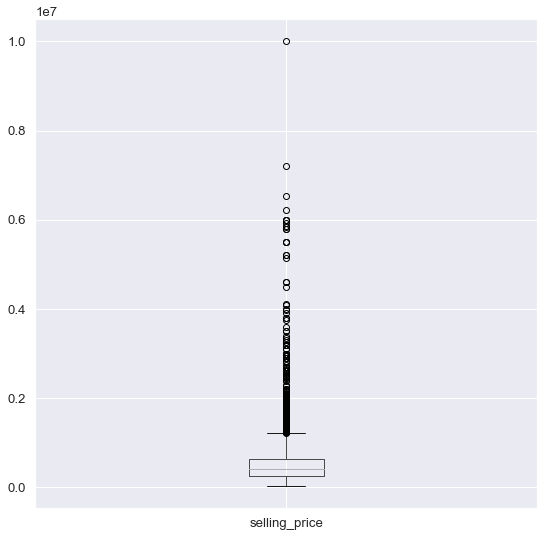

In [438]:
boxplot1 = df_train_c.boxplot(column=['selling_price'], figsize = (9, 9))

In [439]:
df_train_c['selling_price'].describe()

count    5.840000e+03
mean     5.229601e+05
std      5.354320e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.050000e+05
75%      6.400000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

In [465]:
#df_train_c = df_train.copy()
#df_test_c = df_test.copy()
df_train_c.drop(df_train_c[df_train_c.max_power > 150].index, inplace=True)
df_test_c.drop(df_test_c[df_test_c.max_power > 150].index, inplace=True)
df_train_c.drop(df_train_c[df_train_c.km_driven > 200000].index, inplace=True)
df_test_c.drop(df_test_c[df_test_c.km_driven > 200000].index, inplace=True)

df_train_c.drop(df_train_c[df_train_c.selling_price > 2000000].index, inplace=True)
df_test_c.drop(df_test_c[df_test_c.selling_price > 2000000].index, inplace=True)


df_train_c.reset_index(drop = True, inplace = True)
df_test_c.reset_index(drop = True, inplace = True)
print(df_train_c.shape)
print(df_test_c.shape)

(5464, 15)
(911, 15)


In [466]:
y_train = pd.DataFrame(df_train_c['selling_price'])
y_test = pd.DataFrame(df_test_c['selling_price'])
X_train_cat = df_train_c.drop(['selling_price', 'name'], axis=1)
X_test_cat = df_test_c.drop(['selling_price', 'name'], axis=1)

In [467]:
X_train_cat.to_csv('train_set.csv')

In [441]:
y_train = pd.DataFrame(df_train_c['selling_price'])
y_test = pd.DataFrame(df_test_c['selling_price'])
X_train_cat = df_train_c.drop(['selling_price', 'name'], axis=1)
X_test_cat = df_test_c.drop(['selling_price', 'name'], axis=1)
#assert X_train_cat.shape == (5840, 10)
#assert X_test_cat.shape == (1000, 10)

X_dum_train = pd.get_dummies(X_train_cat, drop_first=True)
#print(X_dum_train.shape)
#print(X_dum_train.head(4))
# your code here

X_dum_test = pd.get_dummies(X_test_cat, drop_first=True)
#print(X_dum_test.shape)
#print(X_dum_test.head(4))

scal = StandardScaler()

scal.fit(X_dum_train)
X_train_tr = pd.DataFrame(scal.transform(X_dum_train), columns = X_dum_train.columns)
X_test_tr = pd.DataFrame(scal.transform(X_dum_test), columns = X_dum_test.columns)

rid_reg = Ridge()
parameters = {'alpha':[0.01, 0.1, 1, 10, 100, 1000, 10000]}
rid_reg_grid = GridSearchCV(rid_reg, param_grid = parameters, scoring = r2_score, cv = 10)
rid_reg_grid.fit(X_train_tr, y_train).best_params_
print(rid_reg_grid.best_params_)

lr_reg_l2 = Ridge(alpha = 0.01)

lr_reg_l2.fit(X_train_tr, y_train)

pred_l2 = lr_reg_l2.predict(X_test_tr)

#km_driven убрать больше 0.5e+06
#mileage убрать больше 30
#engine убрать больше 2500
#max_power убрать больше 150



#Ridge without feature-engineering
#Test metrics:
#R2 score:  0.6195516629624175
#MSE:  218692568074.36163

#Train metrics:
#R2 score:  0.64934179470335
#MSE:  100512085297.7904

print("Test metrics:")
print("R2 score: ", r2_score(y_test, pred_l2))
print("MSE: ",MSE(y_test, pred_l2))
print()
print("Train metrics:")
print("R2 score: ", r2_score(y_train, lr_reg_l2.predict(X_train_tr)))
print("MSE: ",MSE(y_train, lr_reg_l2.predict(X_train_tr)))

{'alpha': 0.01}
Test metrics:
R2 score:  0.7253668001507663
MSE:  21315478185.43289

Train metrics:
R2 score:  0.718403557679258
MSE:  22060655454.533195


In [443]:
import pickle
pickle.dump(lr_reg_l2, open('model_hw1.pkl', 'wb'))

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [444]:
def business_metrics(y_true, y_pred):
    kol_all = len(y_true)
    #print(kol_all)
    y_true1 = np.array(y_true)
    y_pred1 = np.array(y_pred)
    kol = 0
    for i in range(0, kol_all):
        #print(y_true1[i])
        dev = abs(y_true1[i] - y_pred1[i])
        per = dev / y_true1[i]
        if per > 0.1:
            kol += 1
    return (1 - kol/kol_all)
business_metrics(y_test, pred_l2)

0.29088913282107576

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link

In [356]:
import pickle

with open('model_hw1.pkl', 'rb') as f:
    data = pickle.load(f)

In [357]:
print(data)

Ridge(alpha=0.01)


In [358]:
pickled_model = pickle.load(open('model_hw1.pkl', 'rb'))
pickled_model.predict(X_test_tr)

array([[ 513427.06523546],
       [ 774310.32073145],
       [ 522312.81191785],
       [ 176730.04205551],
       [ 973165.69787176],
       [ 215537.5573481 ],
       [ 294954.92085985],
       [  67047.48693917],
       [ 789692.31171381],
       [ 971267.91375975],
       [ 764921.57200265],
       [ 173439.88382163],
       [ 662280.52497754],
       [ 516174.24526024],
       [ 248918.64557893],
       [ 424993.42472266],
       [ 384701.85552799],
       [ 314469.86358965],
       [  46307.16989166],
       [ 736914.63782397],
       [ 315484.11505503],
       [ 588908.65191293],
       [ 622401.55162702],
       [ 805929.32277117],
       [ 811112.80278425],
       [ 435135.98697811],
       [ 564497.56021446],
       [ 965458.02914426],
       [ 847292.5968088 ],
       [ 537078.32267656],
       [ 429183.46142848],
       [ 322454.09147843],
       [ 291945.99941344],
       [ 611196.89234963],
       [ 367644.01488355],
       [ 535710.95086556],
       [ 768740.86203215],
 

In [359]:
X_train_tr.to_csv('train_set.csv')